In [1]:
##Рубежный Контроль№1
##Старых Федор
##ИУ5-65Б
##Вариант по списку группы - 16

In [2]:
##Импорт библиотек
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [3]:
data = pd.read_csv('FIFA_2018_Statistics.csv', sep=',')

In [4]:
##характеристики датасета
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [5]:
# Колонки с пропусками
cols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
cols_with_na

['1st Goal', 'Own goals', 'Own goal Time']

In [6]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in cols_with_na]

[('1st Goal', 0.265625), ('Own goals', 0.90625), ('Own goal Time', 0.90625)]

In [7]:
data.drop(['Own goals'], axis=1, inplace=True)

Text(0.5, 1.0, 'Distribution of 1st Goal')

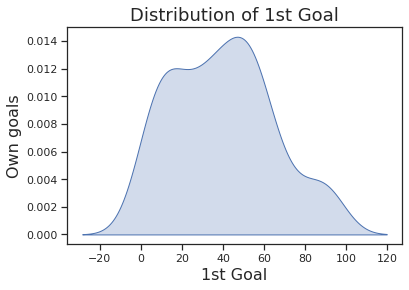

In [8]:
g = sns.kdeplot(data=data, x="1st Goal", shade=True)
g.set_xlabel("1st Goal", size = 16)
g.set_ylabel("Own goals", size = 16)
plt.title('Distribution of 1st Goal', size = 18)

In [9]:
data[['Own goal Time']].describe()

,Own goal Time
count,12.000000
mean,45.833333
std,29.978275
min,12.000000
25%,21.750000
50%,35.000000
75%,75.750000
max,90.000000


In [10]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data[['1st Goal']])
imp_num = SimpleImputer(strategy='most_frequent')
data_num_imp = imp_num.fit_transform(data[['1st Goal']])
data['1st Goal'] =data_num_imp

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/impute/_base.py:356: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)


In [11]:
# Колонки с пропусками
cols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
cols_with_na

['Own goal Time']

In [12]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in cols_with_na]

[('Own goal Time', 0.90625)]

In [13]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,10,0,0,0,No,90.0,Group Stage,No,0,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,12,2,0,0,No,90.0,Group Stage,No,0,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,22,1,0,0,No,90.0,Group Stage,No,0,90.0


In [14]:
data.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goal Time'],
      dtype='object')

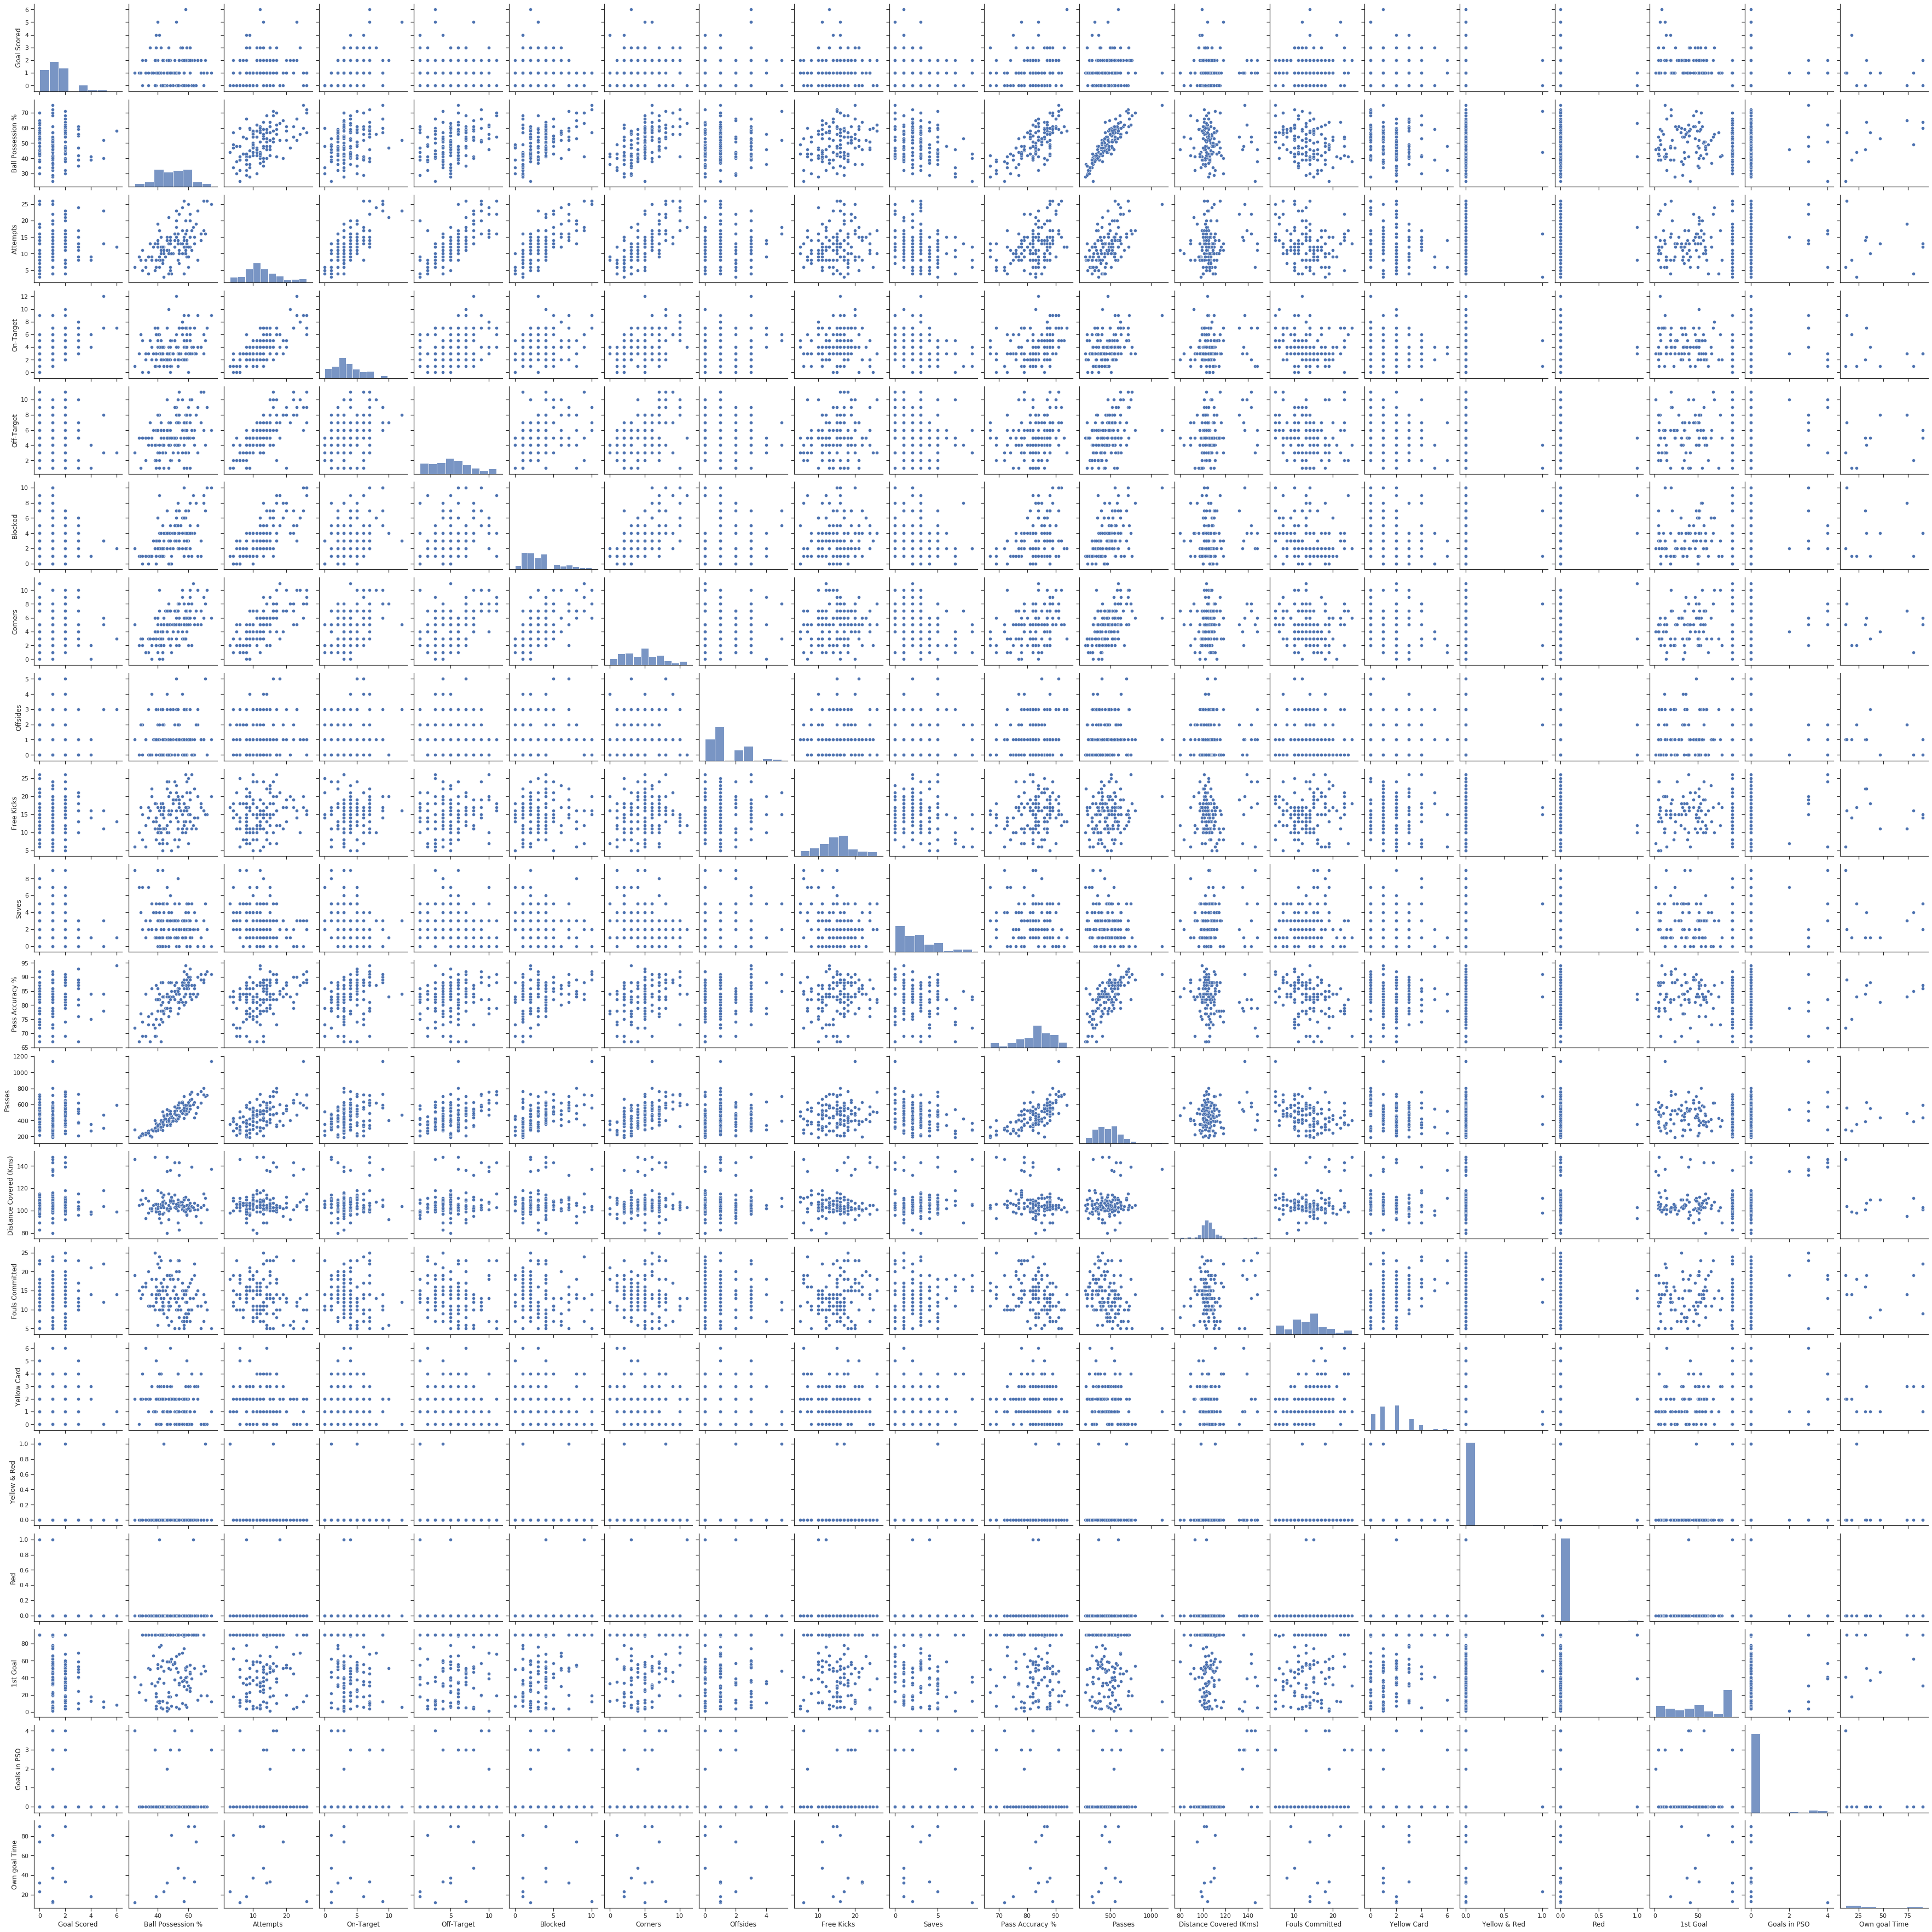

In [15]:
sns.pairplot(data)